

# Observing Data (Workbook)

### ITCS 5156:  Applied Machine Learning 
### Minwoo "Jake" Lee & Benjamin Poole

# Goal
The goal of this activity is to introduce and practice using popular data science libraries by doing some very basic data handling and visualization. You'll want to fill in any code that is specified by the `TODO` comments and Markdown cells. It should be noted, that all the correct outputs are given below each code cell. It might be useful to duplicate all the `TODO` cells so you can try to match the correct output with your own code!

# Agenda

In this lab, you will go step-by-step procedure to play with data. The exercise is composed of 

- Quick overview of Jupyter Notebook
- Practice how to deal with data **without** using ML tools such as
  - Navigate and download data in UCI Repository
  - Load data via Numpy and Pandas
  - Apply simple preprocessing
  - Generate plots to visualize data via Matplotlib and Pandas
  - Learn how to Streamlit data
  
  
### To get complete credit for the lab, you need to finish all the TODO's. Make sure to finish the all in here:
1. [TODO1](#TODO1) (5 points)
1. [TODO2](#TODO2) (5 points)
1. [TODO3](#TODO3) (10 points)
1. [TODO4](#TODO4) (10 points)
1. [TODO5](#TODO5) (5 points)
1. [TODO6](#TODO6) (5 points)
1. [TODO7](#TODO7) (10 points)
1. [TODO8](#TODO8) (10 points)
1. [TODO9](#TODO9) (5 points)
1. [TODO10](#TODO10) (5 points)
1. [TODO11](#TODO11) (5 points)
1. [TODO12](#TODO12) (10 points)
1. [TODO13](#TODO13) (15 points)


# Jupyter Basics

## What is Jupyter Notebook?
Jupyter Notebook is a combination of code and text elements (Markdown, figures, equations, and other media). It is a server-client application which runs via your browser and local-host. Every notebook has a kernel which is your computational engine for running the code (the Python kernel is used by default although other language kernels can be used).

Notebook has become a popular tool for data scientist due to its natural integration with data visualization. In addition, it has become popular meidum for introducing coding concepts, developing interactive code, live demos, and code sharing in general.

## Useful Jupyter Tricks and Commands
Below are list of commands you might find yourself frequently using. If you are using a Mac simply replace `CTRL` with `CMD`.
- List of keybindings `H`
- Run a cell when selected `CTRL-ENTER`
- Run call and move to next cell `SHIFT-ENTER`
- Insert a new cell `ESC-B`
- Convert cell to Markdown cell `ESC-M`
- Delete a cell `ESC-D-D`
- Save notebook `CTRL-S`
- Search only over code `ESC-F`
- Show/hide cell output `ESC-O`
- To reset your notebook's environment and memory go to the menu bar at the top of you screen and nagviate to `Kernel -> Restart` **(Note: this will not clear cell output)**
    - Other commands can be found under `Kernel` such as `Restart & Clear Output` which will clear all cell output 

## References
- [Offical Jupyter documentation](https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/what_is_jupyter.html)
- [Interesting Jupyter tips and tricks](https://towardsdatascience.com/jupyter-notebook-hints-1f26b08429ad)
- [More tips and tricks](https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/)
- [Offical documentation on iPython magics](https://ipython.readthedocs.io/en/stable/interactive/magics.html)

# Preparing Data

Let's visit UCI Data Repository: https://archive.ics.uci.edu/ml/index.php. Here, you can find datasets that you might be interested in, although there are many other data repositories out there as well. In this practice, download the following two datasets:
- Forest Fires Data: https://archive.ics.uci.edu/ml/datasets/Forest+Fires
    - Download `forestfires.csv` and `forestfires.names 	`
- Auto MPG Data: https://archive.ics.uci.edu/ml/datasets/Auto+MPG
    - Download `auto-mpg.data-original 	`

First, we import the libraries we are going to use. For data handling, we can use either Numpy or Pandas. For plotting, we will use Matplotlib - although Pandas can do some plotting as well. 

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# This is a python magic command.
# This command allows the output of matplotlib to be displayed inline, i.e. under the cell.
%matplotlib inline

Once you download the data, you can run the following shell commands to see the content of a file.

A command beginning with % represents a magic command built-in Jupyter Notebook. 
If you need further reference for the magic commands, please refer to https://ipython.readthedocs.io/en/stable/interactive/magics.html. 

In [2]:
%pfile forestfires.csv

Object `forestfires.csv` not found.


In case you are using **Linux or Mac,** you can run shell commands by using the `!` symbol in a code cell. In general, the exclamation symbol `!` in a code cell allows you to run command line arguments based on your host OS.

Often, I check the content of file by using "head" or "tail" command in the shell. 

For Windows users, to run shell command, you will need additional configuration for running linux shell. 

In [3]:
!head -30 forestfires.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
!tail -30 forestfires.csv

'tail' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
!tail -20 forestfires.names

'tail' is not recognized as an internal or external command,
operable program or batch file.


# Read data with Numpy

## What is Numpy?

Numpy is a scientific library that is frequently used for its  highly optimized linear algebra powers. One of Numpy's main attractions is its N-dimensional array objects which are used in abundance by data scientists. 

We first read the forest fire data with Numpy's loadtxt() function. Try running the following code, but don't worry if it throws an error! Be sure to read the error and try to understand what's going wrong.

**Note: Make sure the "forestfires.csv" is in the same directory as this notebook! Otherwise, you must edit the bellow "forestfires.csv" string with a path to where the data is stored!**

In [6]:
dat = np.loadtxt("forestfires.csv")

ValueError: could not convert string to float: 'X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area'

### How to decipyer error messages?

Well, we start from the actual error message. What does it say? 
Most of time, you will be able to get what it means. 
Afterwards, if you see the function call stack, which is presented above the error message at the bottom, you can see where in the codes it had an error. You don't need to blame anything in the library, so take a look at the part of YOUR codes that has the error (with an error on the left). 


<div id='TODO1'></div>

### TODO1 (5 points)

`TODO`  <ins>Run the cell above and copy the error message (only) to this cell and explain what you think the error is for.</ins>

`Answer`:ValueError: could not convert string to float: 'X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area'

The error is caused by attempting to convert a non-numerical string to a floating point number. 

As we observed in the error (and answered) above, we need to convert strings to numbers. Firstly, this is because Numpy arrays typically don't like storing strings. Secondly, later we will be plotting and preforming numerical computations which will fail if our array contains a string. The following codes provide the converters which use a combination of Python dictionaries and functions to map a string to an integer (Note: The `2` and `3` passed in the converter correspond to the columns in data that contain strings and need to be converted). Lastly, the np.loadtxt() stores the data into np.array *dat*.  

If you want to know more about the np.loadtxt() function check out the documentation [here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html).

**Note: The `np.loadtxt` parameters require bytestrings (i.e., unicode), hence we need to add `b` before every string in the `monthdic` and `daydic`.**

In [27]:
# Python dictionaries that map the expected strings contained withing the data to our specified output
monthdic = {b'jan': 1, b'feb':2, b'mar':3, b'apr':4, b'may':5, b'jun':6, 
            b'jul': 7, b'aug':8, b'sep':9, b'oct':10, b'nov': 11, b'dec': 12}
daydic = {b'mon': 1, b'tue':2, b'wed':3, b'thu':4, b'fri':5, b'sat':6, b'sun':7 }

def month_conv(s):
    """ Simple python function that returns the value from the monthdic given a key. """
    return monthdic[s]

def day_conv(s):
    """ Simple python function that returns the value from the daydic given a key. """
    return daydic[s]

# Returns a np.ndarray object
dat = np.loadtxt("forestfires.csv", delimiter=',', skiprows=1,
                 converters={2:month_conv, 3:day_conv})

dat # Adding a variable to the last line of a cell will automatically print its output below

array([[ 7.  ,  5.  ,  3.  , ...,  6.7 ,  0.  ,  0.  ],
       [ 7.  ,  4.  , 10.  , ...,  0.9 ,  0.  ,  0.  ],
       [ 7.  ,  4.  , 10.  , ...,  1.3 ,  0.  ,  0.  ],
       ...,
       [ 7.  ,  4.  ,  8.  , ...,  6.7 ,  0.  , 11.16],
       [ 1.  ,  4.  ,  8.  , ...,  4.  ,  0.  ,  0.  ],
       [ 6.  ,  3.  , 11.  , ...,  4.5 ,  0.  ,  0.  ]])

The code below is equivalent to the above code but uses lambda functions instead.

Lambda functions are basically functions that you can declare on the spot and can be quite useful for data preprocessing!

`Lambda` functions are basically functions that you can declare on the spot and can be quite useful for data preprocessing, instead of defining a multi-line function! In the below example, `lambda` specifies some input parameter (in this case `x`) just like a typical function. Following the colon we specify what to do with the `lambda` function. Here, we are accessing the `monthdic` given some input `x`. Thus, the `lambda` function will index our dictionary returning a value given some input `x` that acts as our key (if `x` is not a key in our dictionary an error will be thrown). 

In [7]:
# Or using lambda function 
dat = np.loadtxt("forestfires.csv", delimiter=',', skiprows=1, 
                 converters={2: lambda x: monthdic[x], 3: lambda x: daydic[x]})
dat

array([[ 7.  ,  5.  ,  3.  , ...,  6.7 ,  0.  ,  0.  ],
       [ 7.  ,  4.  , 10.  , ...,  0.9 ,  0.  ,  0.  ],
       [ 7.  ,  4.  , 10.  , ...,  1.3 ,  0.  ,  0.  ],
       ...,
       [ 7.  ,  4.  ,  8.  , ...,  6.7 ,  0.  , 11.16],
       [ 1.  ,  4.  ,  8.  , ...,  4.  ,  0.  ,  0.  ],
       [ 6.  ,  3.  , 11.  , ...,  4.5 ,  0.  ,  0.  ]])

We can check the dimensionality of our data by simply adding `.shape` to the end of our `dat` variable. This `np.ndarray` object variable is extremely useful for seeing how many data samples (typically rows) and features (typically columns) we have.

**Note: Checking shapes is very useful when debugging code when we get shape mismatch errors later on!**

In [8]:
dat.shape

(517, 13)

Sometimes, actually in many cases, the data may contain lots of missing values. Let's check if it our data does. To do so we use Numpy's np.isnan() and np.any() functions.  Luckily, we do won't find any for the forest fire data.

**Note: np.isnan returns boolean value, so True indicates a missing value and False indicates no missing value.**

In [9]:
np.isnan(dat)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

Also, `np.any()` allows us to quickly check if there are any True values.

In [10]:
np.any(np.isnan(dat))

False

When you do not know how to use a function but lazy to search on web, you can use question mark `?` to see the quick reference as shown below. Try running the lazy searches below to see the official documentation of `np.isnan` and `np.any`. 

In [11]:
np.any?

In [13]:
np.isnan?

# Now let's read our data with Pandas
## What is Pandas?
Pandas is a high-level data manipulation and analysis tool built on-top of Numpy. In particular, it can be easier to work with when preprocessing data, although it can be slower that Numpy in certain cases. Plus, Pandas tends to be easier on the eyes when visualizing raw datasets. Pandas main object is called `DataFrame` which is similar to Numpy's `ndarray` object.

For this section, we will use the Pandas library. You can find the reference here: https://pandas.pydata.org/pandas-docs/stable/reference/index.html. 


<div id='TODO2'></div>


### TODO2  (5 points)
1. Use Pandas `pd.read_csv()` to load in the forest fire dataset
    - Note: We will not get an error this time as Pandas DataFrame object allows for strings
2. Run the cell to output `df` and observe the raw dataset


**Note: `df` is at the bottom of the cell because this indicates to Jupyter to print the contents of `df` to the output. Jupyter will always output the last line of a code cell if it is a variable.**

In [12]:
#TODO: Load forest fires data using pd.read_csv() 
df = pd.read_csv('forestfires.csv') 
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.00
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.00
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.00
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.00
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.00



### TODO3  (10 points)
Let's now play with some Pandas functions using the Pandas references.
 **Hint: Check out the [Pandas DataFrame methods](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)!**
1. Print the first 5 rows of `df`
2. Print the column names of `df`
3. Print the shape of `df`
4. Print the size of `df`

In [15]:
#TODO: Print the first 5 fows of df
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [17]:
# TODO: Print all column names
df.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [18]:
# TODO: Print the shape of the Pandas DataFrame
df.shape

(517, 13)

In [19]:
# TODO: print the size of the Pandas DataFrame
df.size

6721

<div id='TODO4'></div>

### TODO4 (10 poionts)
Let's replicate what we did with the Numpy example
1. Convert the `df` to a boolean DataFrame where True corresponds to a element with a missing value
    - **Hint: Try Pandas DataFrame `isnull()` method**
2. Check the entire DataFrame to see if there are any missing values
    - **Hint: Use the boolean DataFrame generated from the previous step to check for any True values**
    - **Hint: Try using np.any() like we did with Numpy**

In [13]:
# TODO: Check for missing values (i.e. None/null values) like what we did with Numpy in the previous section
# Hint: Try Pandas DataFrame `isnull()` method
pd.isnull(df)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
# TODO: Check the entire DataFrame to see if there are any missing values
# Hint: Use the boolean DataFrame generated from the previous step to check for any True values
# Hint: Try using np.any() like we did with Numpy
pd.isnull(df).any() == True

X        False
Y        False
month    False
day      False
FFMC     False
DMC      False
DC       False
ISI      False
temp     False
RH       False
wind     False
rain     False
area     False
dtype: bool

<div id='TODO5'></div>

### TODO5  (5 points)
Splicing arrays and DataFrames is very useful way of looking at only parts of your data. Pandas allows you to splice a DataFrame based on column names and intergers.

1. Print the values for the 'area' column in `df` by splicing it
    - **Hint: Checkout  Pandas DataFrame documentation `loc` and `iloc` methods**

In [22]:
# TODO: Print the values for the "area" column in `df`
# Hint: Checkout  Pandas DataFrame documentation `loc` and `iloc` methods
df.area


0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
5       0.00
6       0.00
7       0.00
8       0.00
9       0.00
10      0.00
11      0.00
12      0.00
13      0.00
14      0.00
15      0.00
16      0.00
17      0.00
18      0.00
19      0.00
20      0.00
21      0.00
22      0.00
23      0.00
24      0.00
25      0.00
26      0.00
27      0.00
28      0.00
29      0.00
       ...  
487    16.40
488    46.70
489     0.00
490     0.00
491     0.00
492     0.00
493    43.32
494     8.59
495     0.00
496     2.77
497    14.68
498    40.54
499    10.82
500     0.00
501     0.00
502     0.00
503     1.95
504    49.59
505     5.80
506     0.00
507     0.00
508     0.00
509     2.17
510     0.43
511     0.00
512     6.44
513    54.29
514    11.16
515     0.00
516     0.00
Name: area, Length: 517, dtype: float64

<div id='TODO6'></div>

### TODO6  (5 points)
Pandas allows you to automatically compute some useful statistics about your DataFrame, such as mean and STD.

1. Print the summary using the Pandas describe() method

In [23]:
# TODO: Print the summary using the Pandas describe() method
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


## Visualize data using Matplotlib

By plotting data in graphs, visualizing data enables us to read or understand the data easy. It helps you analyze the data and find patterns or errors, even before applying data. As we see in Hans Rolling's video, you might be able to tell a strong from it and gain insights of it.

However, given high dimensionality of data, often it is hard to visualize in 2D or 3D space where we live. This may need additional discussions later in this semester.

### What is Matplotlib?
Matplotlib is a very popular and easy to work with plotting library that provides a MATLAB-like interface. It also just so happens to integrate nicely with Jupyter Notebooks, Numpy, and Pandas.

<div id='TODO7'></div>

### TODO7  (10 points)
1. Plot a line graph using the 'area' column from the previous step by using plt.plot()
    - Documentation for [plt.plot()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)
    - **Hint: plt.plot() will automatically generate the x-axis if not passed**
2. Plot a histogram graph using the 'area' column from the previous step by using plt.hist()
    - Documentation for [plt.hist()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html)
    - **Hint: plt.hist() will automatically generate the bins if not passed**

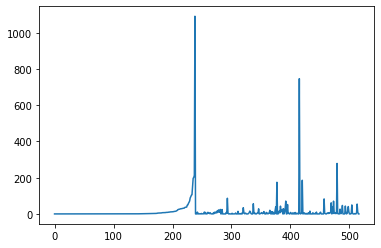

In [24]:
# TODO: Plot a line graph using the 'area' values from the previous step by using plt.plot()
# Hint: plt.plot() will automatically generate the x-axis if not passed
plt.plot(df.area)

**TODO: plot the histograme of  'area' values by using plt.hist() **

(array([508.,   6.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([   0.   ,  109.084,  218.168,  327.252,  436.336,  545.42 ,
         654.504,  763.588,  872.672,  981.756, 1090.84 ]),
 <a list of 10 Patch objects>)

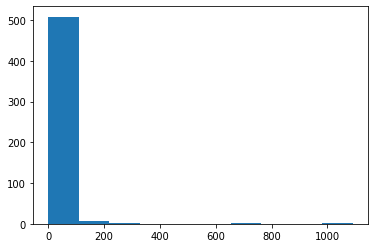

In [25]:
# TODO: Plot a histogram graph using the 'area' values from the previous step by using plt.hist()
# Hint: plt.hist() will automatically generate the bins if not passed
plt.hist(df.area)

## Putting it all together
### Splitting data into features and targets
Later in the course we'll find that we will want to predict a given feature which we refer to as our target. The remaining features in our data will acts as our input data to predict the target. Thus, it can be useful to split our input features and target into two different variables.  

To predict the target ('area'), we store the 'area' column into a variable **T** and the treat the rest of the columns as input features, storing them inside **X**.

In [ ]:
# Store target feature in T
T = df.loc[:, 'area'].copy()
T

In [ ]:
# Store remaining features in X
X = df.iloc[:, :-1].copy()
X

Notice that our X data contains strings for the 'month' and 'day' columns. Remeber we did not convert these strings to numerical data yet for our Pandas exmaple. 

<div id='TODO8'></div>

### TODO8 (10 points)
1. Create a converter similar to what we did in the Numpy example
    - **Hint: You can use the `apply()` method for the Pandas DataFrame - try finding the documentation on your own** 
    - **Hint: Reuse the dictionaries and functions used in the Numpy example for the `apply()` method**

In [38]:
# TODO: Create a converter similar to above to converter we used for the Numpy example
# Hint: You can use the apply() method for the Pandas DataFrame - try finding the documentation on your own
# Hint: Reuse the dictionaries and functions used in the Numpy example for the apply() method
monthdic2 = {'jan': 1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 
            'jul': 7, 'aug':8, 'sep':9, 'oct':10, 'nov': 11, 'dec': 12}
daydic2 = {'mon': 1, 'tue':2, 'wed':3, 'thu':4, 'fri':5, 'sat':6, 'sun':7 }
T=df.area
X=df.drop('area',axis=1)
X['month']=X['month'].apply(lambda x: monthdic2[x])
X['day']=X['day'].apply(lambda x: daydic2[x])


X

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0
5,8,6,8,7,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0
6,8,6,8,1,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0
7,8,6,8,1,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0
8,8,6,9,2,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0
9,7,5,9,6,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0


The following codes plots all the input features by using subplot() arranged in 3 by 4 grid (i.e. there are 3*4=12 suplots). The tight_layout() prevents the subfigures from overlapping. 

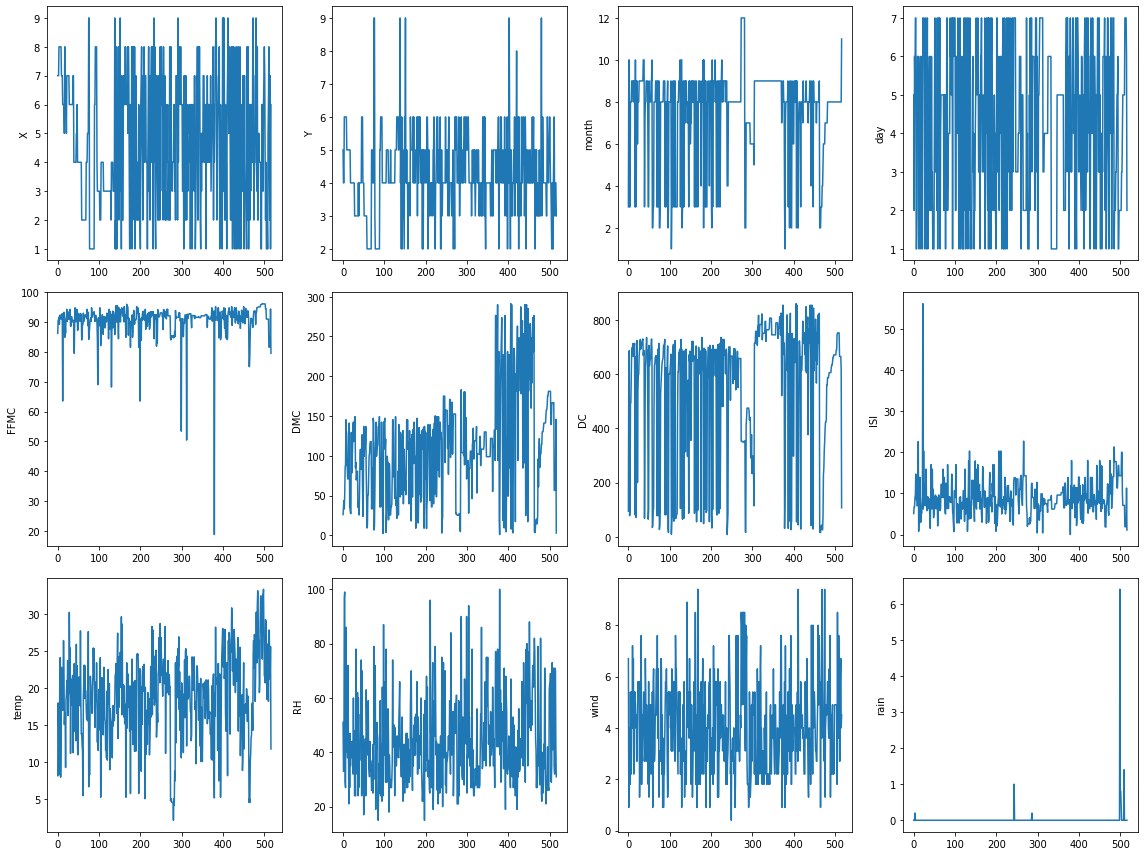

In [35]:
fig = plt.figure(figsize=(16,12))
plt.clf() # Clear previous plt figure
for i in range(12):
    plt.subplot(3, 4, i+1) # Selects which subplot to plot to
    plt.plot(X.iloc[:, i]) # Plots a given column
    plt.ylabel(X.columns.values[i]) # Sets Y label
fig.tight_layout()

<div id='TODO9'></div>

### TODO9  (5 points)
1. Try to generate a 3 by 4 subplot of your own presenting the correlation between each input feature and the target
    - **Hint: The code should be very similar to the above example**
    

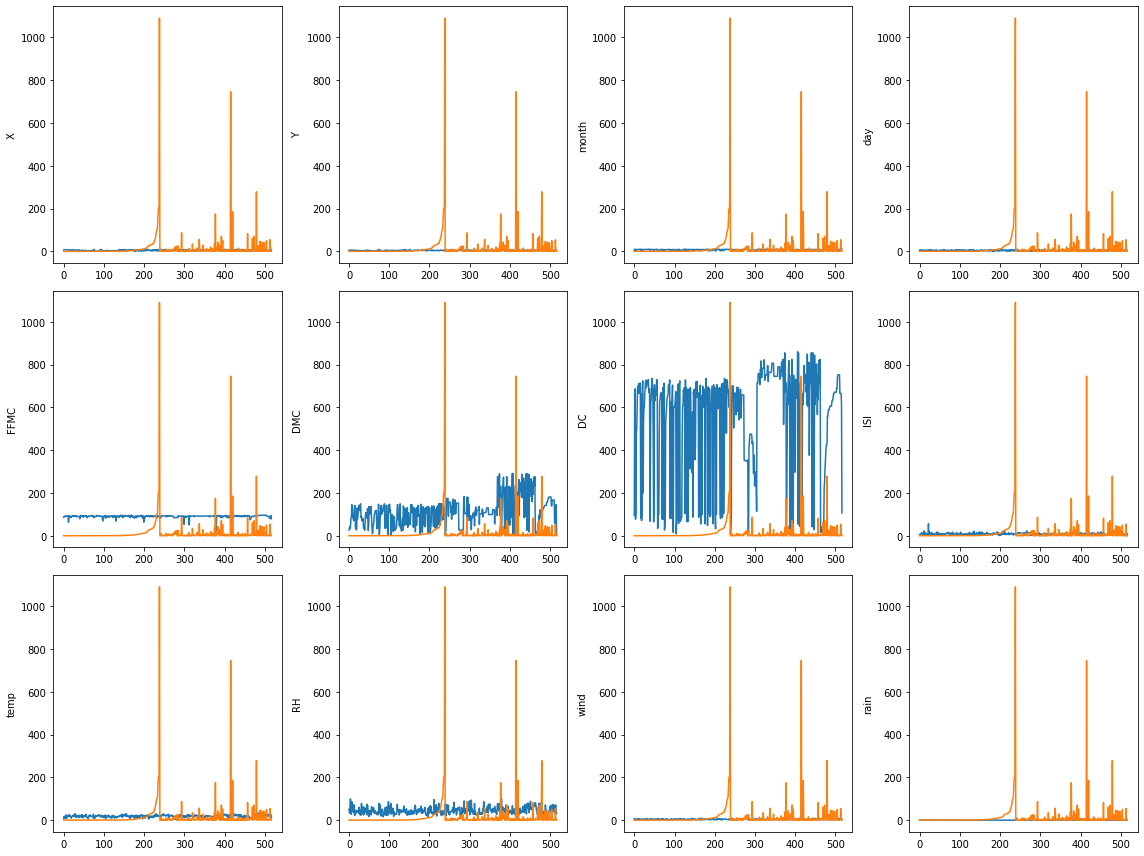

In [36]:
# TODO: Try to generate a 3 by 4 subplot of your own presenting the correlation between each input feature and the target
# Hint: The code should be very similar to the above example

fig = plt.figure(figsize=(16,12))
plt.clf() # Clear previous plt figure
for i in range(12):
    plt.subplot(3, 4, i+1) # Selects which subplot to plot to
    plt.plot(X.iloc[:, i]) # Plots a given column
    plt.plot(T)
    plt.ylabel(X.columns.values[i]) # Sets Y label
fig.tight_layout()



  

When it is necessary, you can concatenate multiple dataframes to recover your original dataframe. Checkout the code below which concats our data into D. 

In [40]:
D = pd.concat([X, T], axis=1)
D

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
5,8,6,8,7,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.00
6,8,6,8,1,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.00
7,8,6,8,1,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.00
8,8,6,9,2,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.00
9,7,5,9,6,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.00


## Plot with Pandas

We can recreate the exact same plotting done above but now with Pandas plotting (recall Pandas plotting basically wraps Matplotlib or other plotting libraries).

Notice we are using `for i, c in enumerate(X.columns.values):` this allows us to use the data values found within `X.columns.values` without indexing it while the `enumerate()` Python function creates an increasing indexer `i`. Try uncommenting the print statement below to see for yourself what this for-loop is doing.

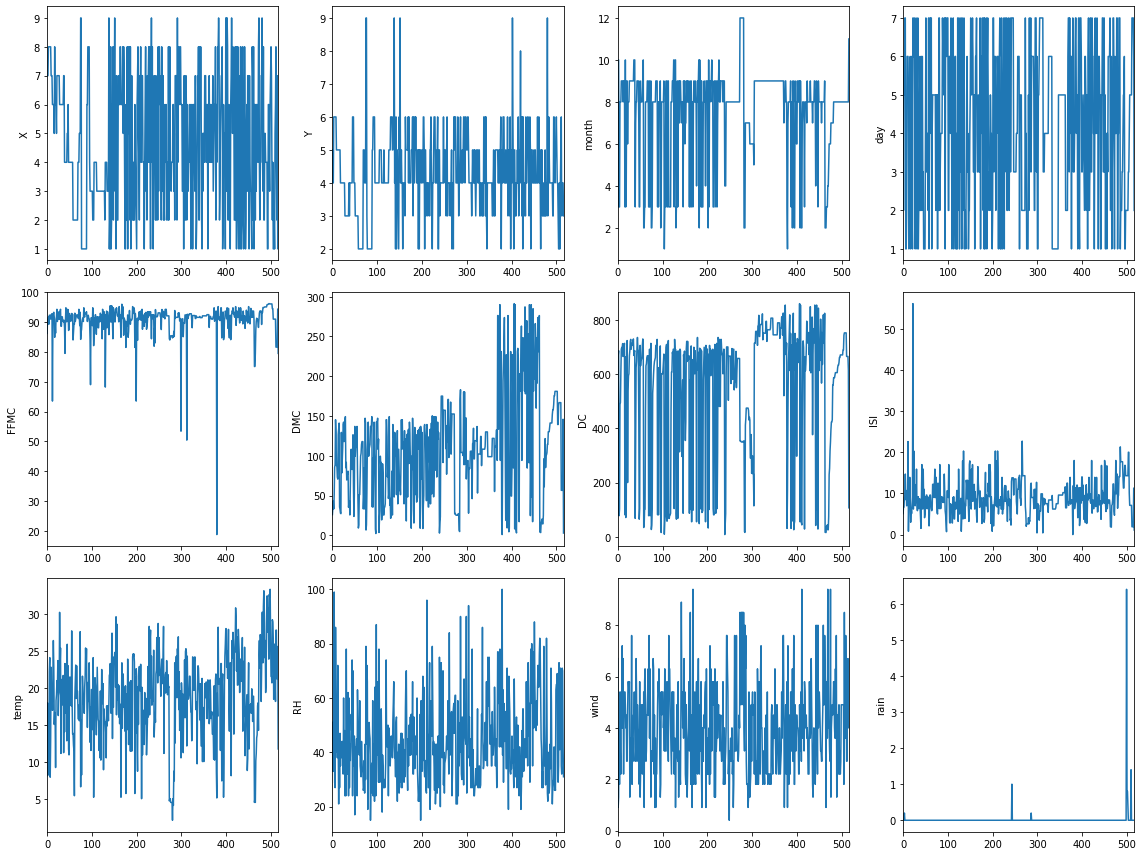

In [41]:
# Try with Pandas plots
fig, axes = plt.subplots(3,4)
fig.set_figheight(12)
fig.set_figwidth(16)
for i, c in enumerate(X.columns.values):
    D.iloc[:, i].plot(y=c, ax=axes[int(i/4), i%4])
    axes[int(i/4), i%4].set_ylabel(c)
fig.tight_layout()

Sometimes, it does not make sense connect all the data points with a line as all the data points might not be related. Scatter plots can help you to present the data as a point without the connecting line. 

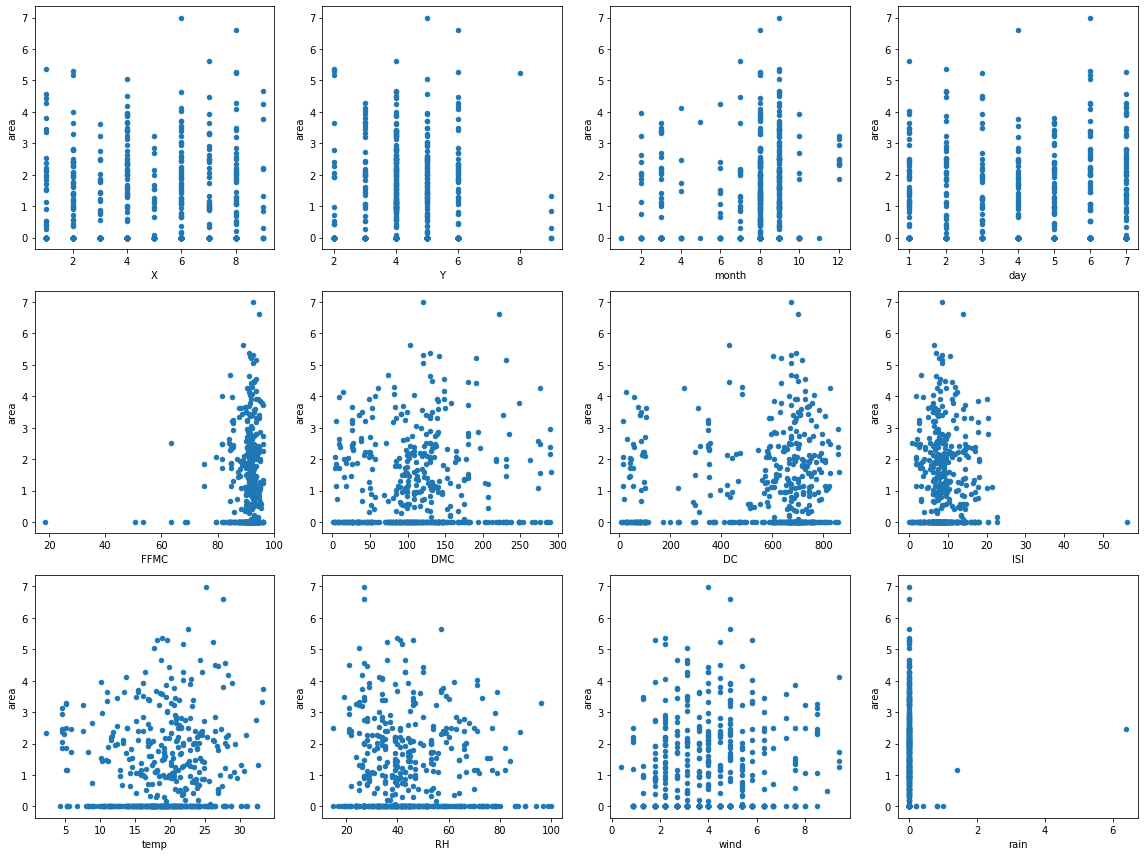

In [48]:
def area_scatter(D):
    """ Function to quickly create matplotlib subplots"""
    fig, axes = plt.subplots(3,4)
    fig.set_figheight(12)
    fig.set_figwidth(16)
    for i,c  in enumerate(X.columns.values):
        #D.plot.hexbin(c, 'area', ax=axes[int(i/4), i%4])
        D.plot.scatter(c, 'area', ax=axes[int(i/4), i%4])
    fig.tight_layout()
    
area_scatter(D)

Recall, that the histogram of target values (area values) had many values close-to-zero (check out histogram below for reference). Meaning, our data is skewed! This can be problematic in further analysis or ML model application. This is because close-to-zero values can sometimes be more different from one anther than their small values elude to. Therefore, to amplify these differences we want to spread out these close-to-zero values so our data is less skewed.

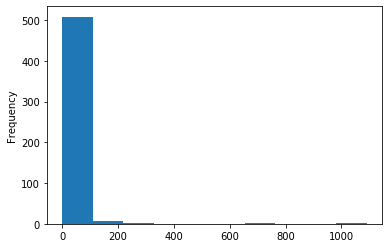

In [42]:
T.plot.hist()

<div id='TODO10'></div>

### TODO10  (5 points)
1. Try applying the logarithm to each sample in the target data `T`. Remember the $log(0)$ is not possible! So if you have data samples that equal 0, then try adding 1 to every sample and then take the log. Note, if we only add 1 to the zero-valued data it would bias our data, hence we add 1 to all data samples.
    1. Hint: Use Pandas `apply()` method again but now applying the log to every sample

In [43]:
# Example of what happens if you try to compute log(0)
np.log(T.iloc[0])

C:\Users\Zachary\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


-inf

In [45]:
# TODO: Try applying the logarithm on the target data `T`
# Hint: Use Pandas apply() method again but now applying the log to every sample
# Hint: Remember the log(0) is not possible, try adding 1!
T=T+1
Tlog=T.apply(np.log)

Tlog

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
5      0.000000
6      0.000000
7      0.000000
8      0.000000
9      0.000000
10     0.000000
11     0.000000
12     0.000000
13     0.000000
14     0.000000
15     0.000000
16     0.000000
17     0.000000
18     0.000000
19     0.000000
20     0.000000
21     0.000000
22     0.000000
23     0.000000
24     0.000000
25     0.000000
26     0.000000
27     0.000000
28     0.000000
29     0.000000
         ...   
487    2.856470
488    3.864931
489    0.000000
490    0.000000
491    0.000000
492    0.000000
493    3.791436
494    2.260721
495    0.000000
496    1.327075
497    2.752386
498    3.726657
499    2.469793
500    0.000000
501    0.000000
502    0.000000
503    1.081805
504    3.923754
505    1.916923
506    0.000000
507    0.000000
508    0.000000
509    1.153732
510    0.357674
511    0.000000
512    2.006871
513    4.012592
514    2.498152
515    0.000000
516    0.000000
Name: area, Length: 517,

Let's concat these two targets to see the differences in the raw data

In [ ]:
pd.concat([T, Tlog], axis=1)

Run the code below to replot the histogram using the our newly generated log targets. Notice anything different? 

In [ ]:
Tlog.hist()

<div id='TODO11'></div>

### TODO11  (5 points)
1. Now regenerate the scatter plot by concatenating `X` and `Tlog` and then running the `area_scatter()` function

In [46]:
#TODO: Now regenerate the scatter plot by concatenating `X` and `Tlog` like we did with `T` and `Tlog`
D = pd.concat([X, Tlog], axis=1)

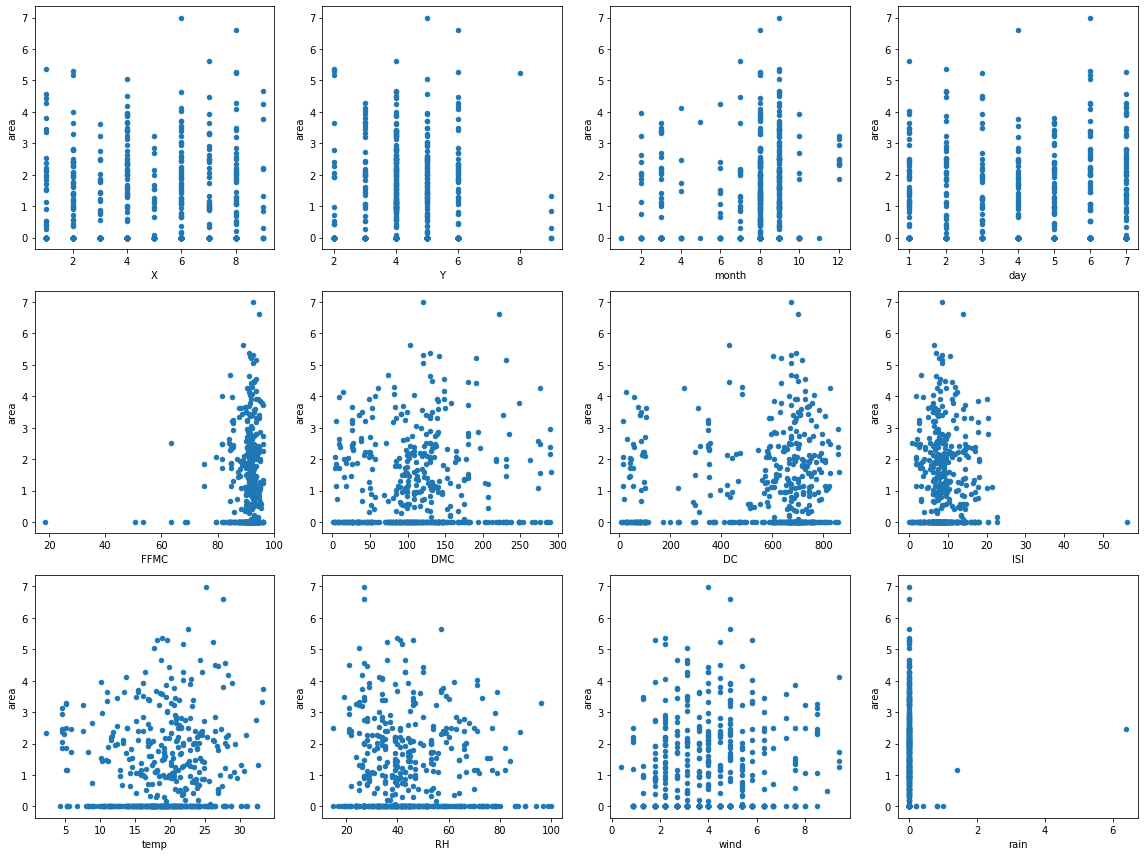

In [49]:
area_scatter(D)

# Practice using the Auto MPG dataset 
Now it's time for you to practice on your own with Auto MPG dataset. Use Pandas to load dataset, check for any null values, and then drop the null values. 

<div id='TODO12'></div>

### TODO11  (10 points)
1. Load the auto-mpg.data-original using Pandas storing the output into `df`. You should use auto-mpg.data-original, which contains missing or null values.
    1. Hint: For this data you'll need to specify the delimiter parameter or all you data will be put into one column instead of separate columns. Be sure to open the `auto-mpg.data-original` to see what delimiter is used to separate the data!
    2. Hint: Additionally you'll need to pass a list of column names using the 'names' parameter. See Auto MPG dataset "Attribute Information" on the website for all the column names.
2. Check if the DataFrame contains any null values using the knowledge you learned above
    1. Hint: Recall the `np.any` and the Pandas method`.isnull()` 
3. For fun, find the locations of the null values using NumPy's `np.where()` function. Be sure to look up what the function does if you don't already know!
    1. Hint: Most NumPy functions/methods should work with Pandas DataFrames. Thus, try combining the Pandas `.isnull()` method with NumPy's `np.where()` function
4. Drop the null values using the `.dropna()` Pandas DataFrame method and save the output into `dfnew`
5. Now, recheck check if the DataFrame contains any null values
    1. Hint: Recall the `np.any` and the Pandas method`.isnull()` 


In [50]:
# TODO: Load the auto-mpg.data-original using Pandas and then display the DataFrame
df=pd.read_csv('auto-mpg.data-original',delim_whitespace=True,names=['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin','car_name'])


df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
5,15.0,8.0,429.0,198.0,4341.0,10.0,70.0,1.0,ford galaxie 500
6,14.0,8.0,454.0,220.0,4354.0,9.0,70.0,1.0,chevrolet impala
7,14.0,8.0,440.0,215.0,4312.0,8.5,70.0,1.0,plymouth fury iii
8,14.0,8.0,455.0,225.0,4425.0,10.0,70.0,1.0,pontiac catalina
9,15.0,8.0,390.0,190.0,3850.0,8.5,70.0,1.0,amc ambassador dpl


In [51]:
# TODO: Test to see if the DataFrame contains any missing values
pd.isnull(df).any()==True

mpg              True
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration    False
model_year      False
origin          False
car_name        False
dtype: bool

In [52]:
# TODO: For fun, find the locations of the null values using Numpy's `np.where()` function
np.where(pd.isnull(df))

(array([ 10,  11,  12,  13,  14,  17,  38,  39, 133, 337, 343, 361, 367,
        382], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 3, 3, 0, 3], dtype=int64))

In [53]:
# TODO: Drop the null values using Pandas DataFrame method
dfnew=df.dropna()
dfnew.shape

(392, 9)

In [54]:
# Now, recheck check if the DataFrame contains any null values
pd.isnull(dfnew).any()==True

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model_year      False
origin          False
car_name        False
dtype: bool

# Streamlit

Streamlit is a fancy dashboard tool for machine learning and data science. It creates data apps for you to navigate the data and your ML algorithms' performance well. Please install and play with it a bit in this exercise. 

If you haven't, please watch the introductory vidoes in the module to start this last part of practice. 


`%%writefile` magic command stores the content in the cell. Using the command, let us create a python file to run streamlit dashboard. 
FYI, `%%writefile -a` appends the content to the existing file if exist. 

<div id='TODO13'></div>

### TODO13  (15 points)

1. First, create the stForestfires.py by running the cell below. Then, in a command shell prompt, run 
  `streamlit run stForestfires.py` 
   under the working directory. 
   Whenever you change the first by appending codes to the file, you can see "automaticall rerun or refreshed" strealit page.

2. Create a checkbox using streamlit.checkbox (st.checkbox after aliasing) and show the raw data only when the check box is selected. 

3. Add a sidebar with a slider to choose a range of area values to see. 

4. Using the min and max of area values, filter the data within the range. 

5. Produce the four figures that shows 1) (x,y) positions, 2) area histogram (as above), 3) area against temperature graph, and 4) area against wind graph. 

6. Have fun to play with your first streamlit dashboard!

<font color="red">NOTE: When you rerun the cell with append `-a` multiple times, the content will be appended repeatedly. Simple fix for the will be rerunning the first write cell and go through. 
Or you can directly edit the python file with a separate editor (i.e., notepad or vim). 
</font>

In [189]:
%%writefile stForestfires.py

import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# SETTING PAGE CONFIG TO WIDE MODE
st.beta_set_page_config(layout="wide")

# LOADING DATA
DATA_URL = (
    "https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv"
)

"""
# Forest Fires

Abstract: This is a difficult regression task, where the aim is to predict the burned area of forest fires, in the northeast region of Portugal, by using meteorological and other data (https://archive.ics.uci.edu/ml/datasets/Forest+Fires)).


"""

@st.cache
def load_data(nrows):
    data = pd.read_csv(DATA_URL, nrows=nrows)
    return data

data = load_data(100000)


"## Summary"    
st.dataframe(data.describe())


Overwriting stForestfires.py


Running the python file with streamlit, you can see the text and summary in your browser. 

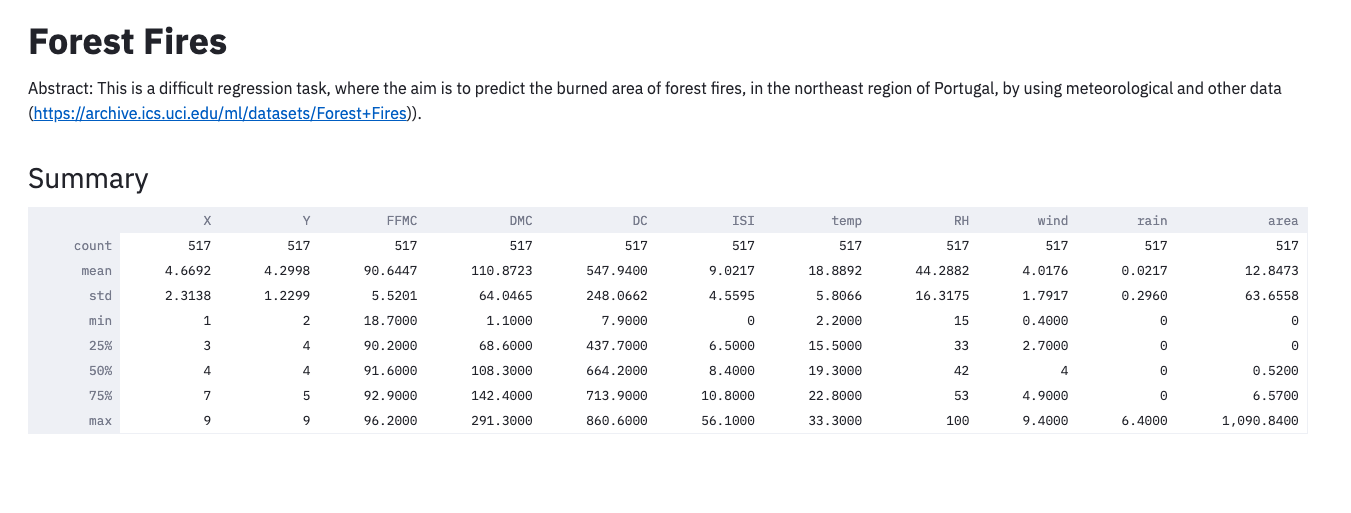

In [190]:
%%writefile -a stForestfires.py


"""
## Raw Data

We can see all the data here by pressing check button.
"""
#TODO: add code to show the raw data table only when the checkbox is selected 
show=st.checkbox('Show Data')
if show:
    st.dataframe(data)
    



Appending to stForestfires.py


The capture screen will look like be once you complete the above cell properly.

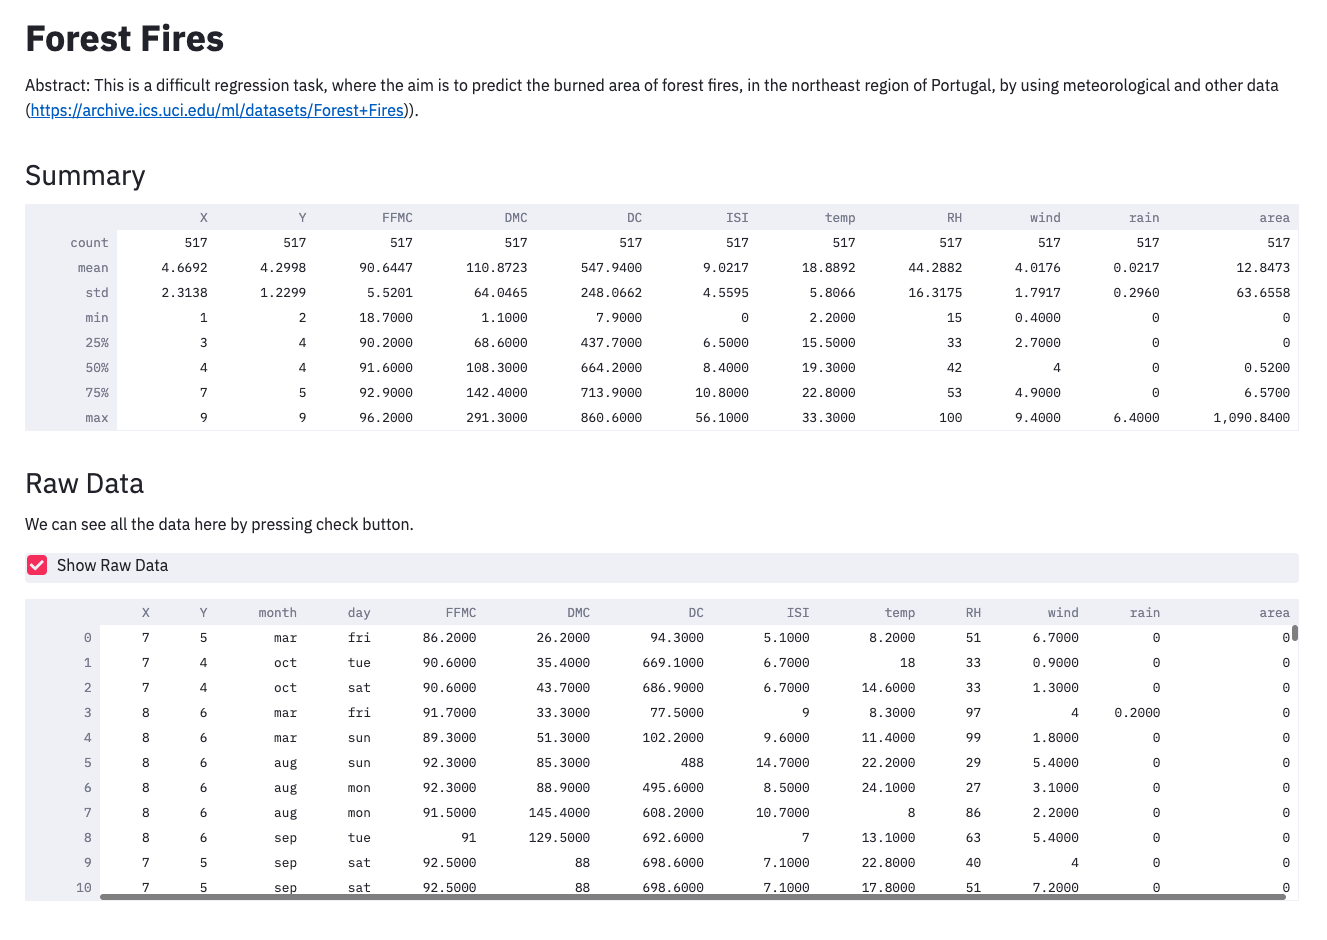

In [191]:
%%writefile -a stForestfires.py 

"## Filtering Data by the Burned Area"
#TODO: add slider to the sidebar

min_area, max_area = st.sidebar.slider('area',0,1100,(27,373),25)



Appending to stForestfires.py


Added sidebar will be similar to this: 

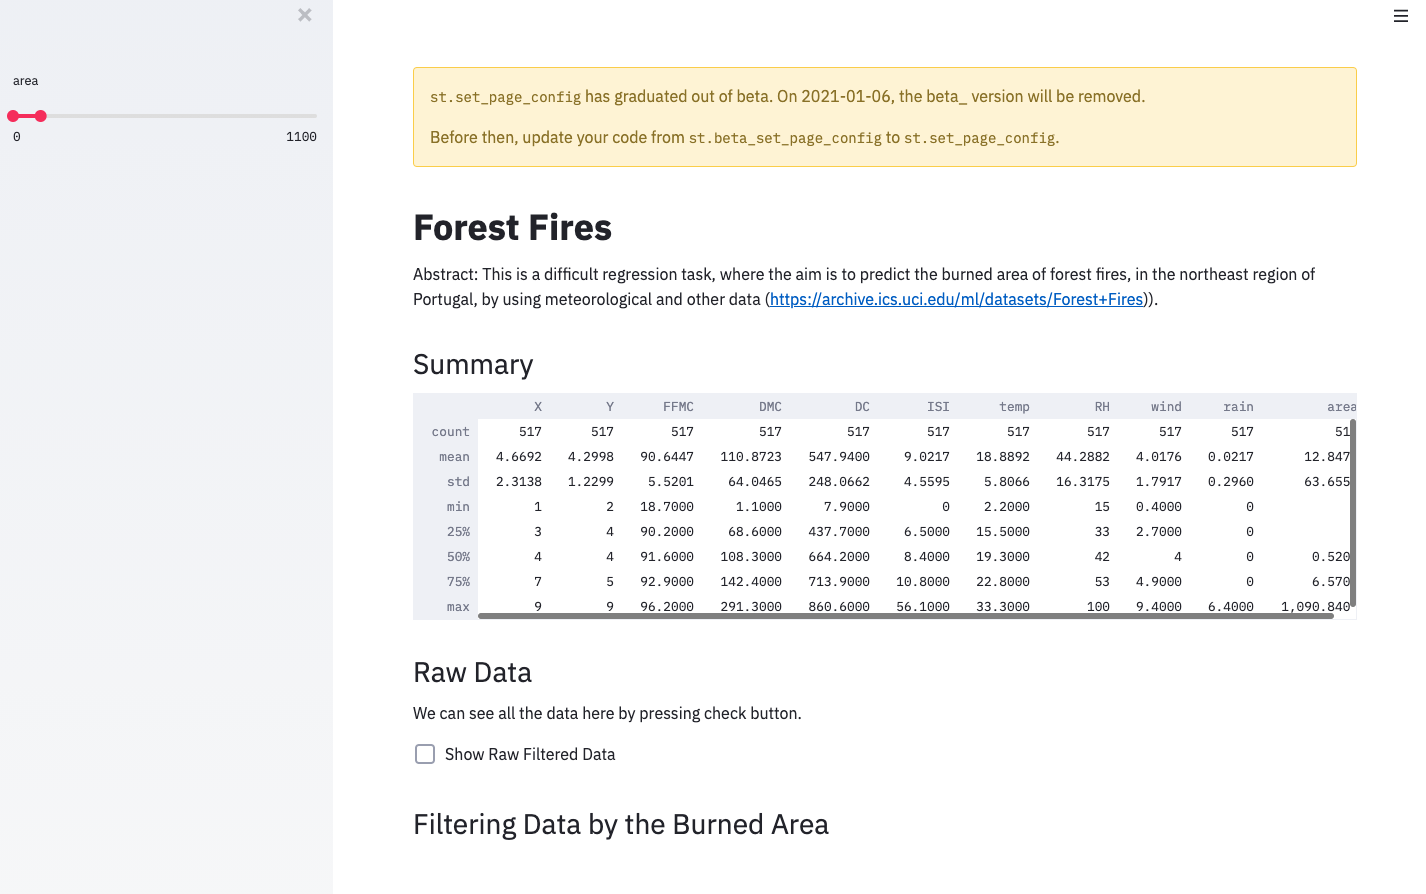

In [192]:
%%writefile -a stForestfires.py 

#TODO: using the min_area and max_area, store filtered data into data
data = data[(data.area>=min_area) & (data.area<=max_area)]

"The number of filtered data samples: ", data.shape

Appending to stForestfires.py


After selecting the area range, you can see the subsamples are in the data now.
Here the range selected was between 22 and 373. The filtered count now is 56 out of 517. 

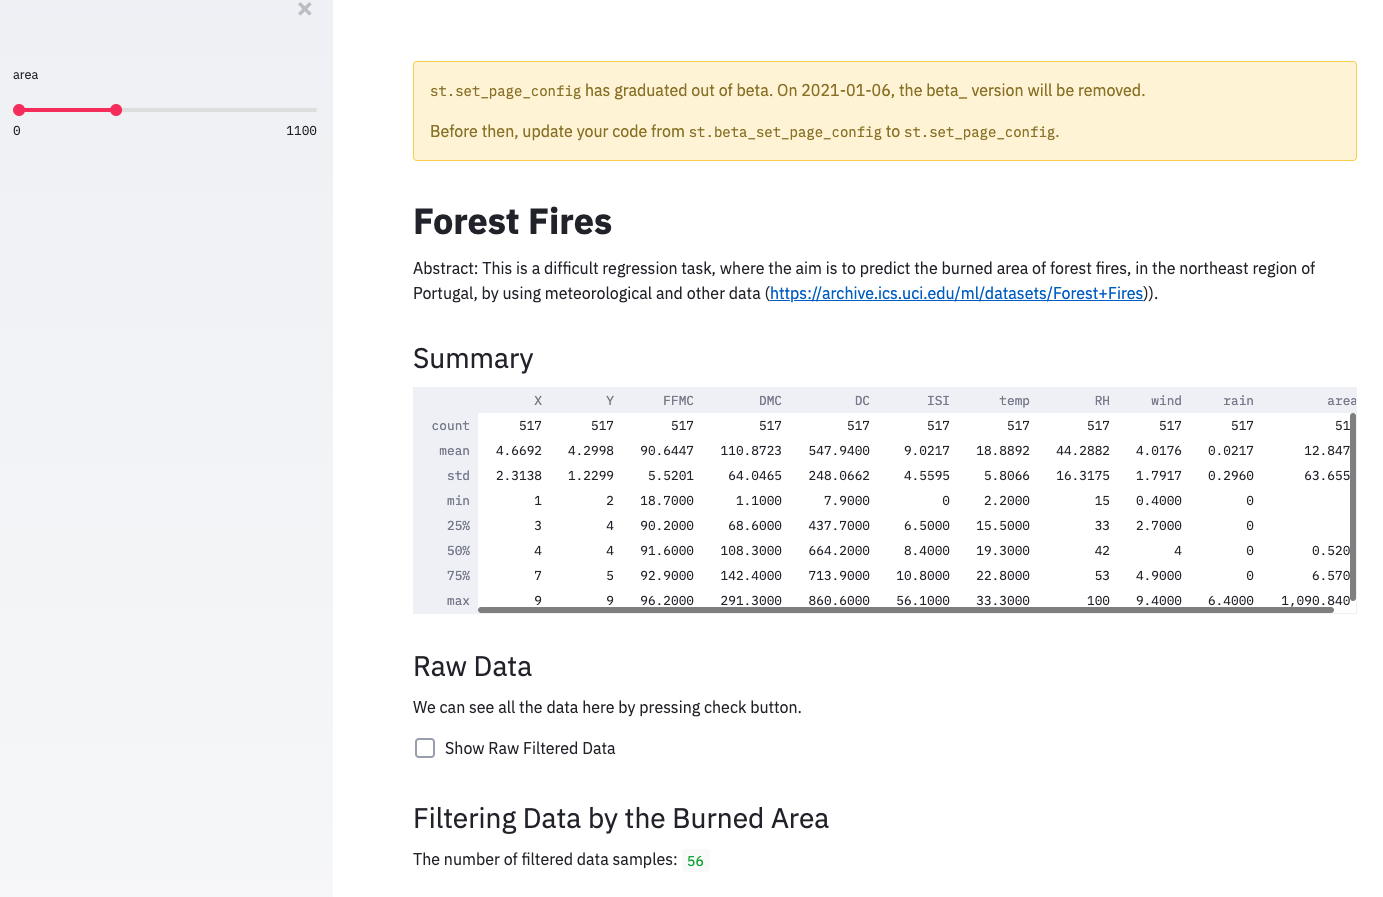

In [193]:
%%writefile -a stForestfires.py 

   
fig, axes = plt.subplots(2,2)

# TODO: Using plot.scatter in pandas, plot X, Y in axes[0][0] (top-left subplot area)
data.plot.scatter(x='X',y='Y',ax= axes[0][0])
# TODO: Using plot.hist in pandas, plot histogram of area data in axes[0][1] (top-right subplot area)
data.hist(column='area',ax=axes[0][1])
# TODO: Using plot in pandas, plot area for temp in axes[1][0] (bottom-left subplot area)
data.temp.plot.area(ax=axes[1][0])
# TODO: Using plot in pandas, plot area for wind in axes[1][1] (bottom-right subplot area)
data.wind.plot.area(x='wind',ax=axes[1][1])

plt.tight_layout()
st.pyplot(fig)


Appending to stForestfires.py


Enjoy the interactive figures while changing the slider on left.

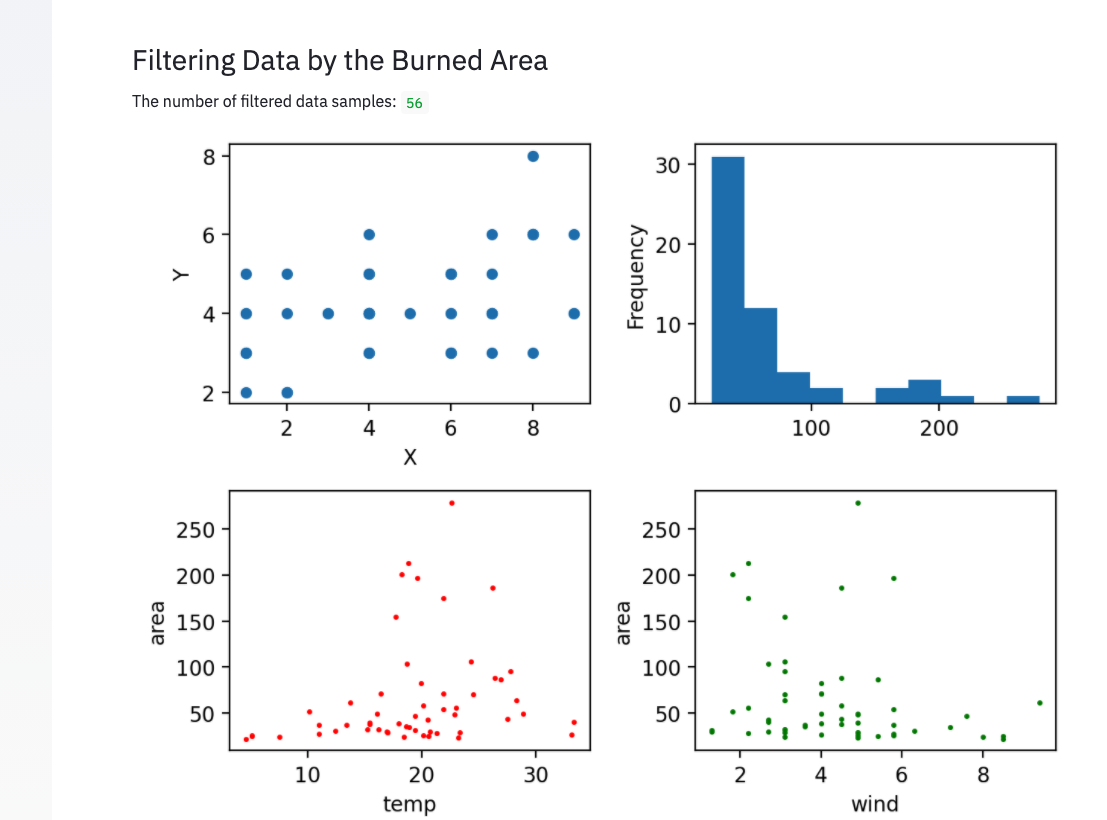